## Clustering Walkthrough: Online Retail Dataset

Dataset:
https://archive.ics.uci.edu/ml/datasets/online+retail

Objective:
Explore the dataset by finding clusters

### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Attribute Information:
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
- Description: Product (item) name. Nominal. 
- Quantity: The quantities of each product (item) per transaction. Numeric.	
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
- UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# You can use read_excel, but it requires additional dependencies, and
# isn't as easy to use as pd.read_csv

df = pd.read_csv('d:/tmp/online-retail/Online Retail.csv', parse_dates=True, encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.isnull().values.any()

True

In [5]:
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,1/12/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,1/12/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,1/12/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,1/12/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,1/12/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,1/12/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,1/12/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,1/12/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,1/12/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,1/12/2010 14:32,0.43,NaN,United Kingdom


In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# See what types we need to convert
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Which of these should we convert to numbers?
```
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
```

In [9]:
print(df['InvoiceNo'].unique())
print(len(df['InvoiceNo'].unique()))

['536365' '536366' '536367' ... '581585' '581586' '581587']
22190


In [79]:
# try converting to number?
# pd.to_numeric(df['InvoiceNo'])

ValueError: Unable to parse string "C536379" at position 141

In [30]:
# try label encode?
from sklearn.preprocessing import LabelEncoder

# Q: is it better to keep separate encoders or to use separate columns?
# A: separate encoders are cheaper for large datasets because you would
# only need to store the label mapping in memory

encoder_invoice_no = LabelEncoder()
df['InvoiceNo'] = encoder_invoice_no.fit_transform(df['InvoiceNo'])

encoder_stock_code = LabelEncoder()
df['StockCode'] = encoder_stock_code.fit_transform(df['StockCode'])

encoder_country = LabelEncoder()
df['Country'] = encoder_country.fit_transform(df['Country'])

In [31]:
# Convert dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
7        2010-12-01 08:28:00
8        2010-12-01 08:28:00
9        2010-12-01 08:34:00
10       2010-12-01 08:34:00
11       2010-12-01 08:34:00
12       2010-12-01 08:34:00
13       2010-12-01 08:34:00
14       2010-12-01 08:34:00
15       2010-12-01 08:34:00
16       2010-12-01 08:34:00
17       2010-12-01 08:34:00
18       2010-12-01 08:34:00
19       2010-12-01 08:34:00
20       2010-12-01 08:34:00
21       2010-12-01 08:34:00
22       2010-12-01 08:34:00
23       2010-12-01 08:34:00
24       2010-12-01 08:34:00
25       2010-12-01 08:35:00
26       2010-12-01 08:45:00
27       2010-12-01 08:45:00
28       2010-12-01 08:45:00
29       2010-12-01 08:45:00
                 ...        
541879   2011-12-09 12:31:00
541880   2011-12-09 12:31:00
541881   2011-12-09 12:31:00
541882   2011-

In [32]:
# what else is left?
df.dtypes

InvoiceNo               int64
StockCode               int64
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                 int64
dtype: object

In [33]:
# Convert Description to Tf-Idf?

df.Description

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
5                SET 7 BABUSHKA NESTING BOXES
6           GLASS STAR FROSTED T-LIGHT HOLDER
7                      HAND WARMER UNION JACK
8                   HAND WARMER RED POLKA DOT
9               ASSORTED COLOUR BIRD ORNAMENT
10                 POPPY'S PLAYHOUSE BEDROOM 
11                  POPPY'S PLAYHOUSE KITCHEN
12          FELTCRAFT PRINCESS CHARLOTTE DOLL
13                    IVORY KNITTED MUG COSY 
14         BOX OF 6 ASSORTED COLOUR TEASPOONS
15              BOX OF VINTAGE JIGSAW BLOCKS 
16             BOX OF VINTAGE ALPHABET BLOCKS
17                   HOME BUILDING BLOCK WORD
18                   LOVE BUILDING BLOCK WORD
19                RECIPE BOX WITH METAL HEART
20                        DOORMAT NEW ENGLAND
21                   JAM MAKING SE

In [34]:
print(df.Description.unique())

print(len(df.Description.unique()))

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
3896


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# description is fairly simple text, so we can try scikit learn's tokenizer
#
# max_df allows us to skip words that are too frequent
# min_df allows us to skip words are are too unique
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
                             max_df=3, min_df=1)

description_tfidf = vectorizer.fit_transform(df.Description)

# print a few features
print(description_tfidf.shape)
print(vectorizer.get_feature_names()[:100])

(406829, 109)
['16x16cm', '17080', '25w', '42', '60x40cm', '8m', 'allium', 'anemone', 'antoienett', 'aqua', 'articulated', 'azure', 'banner', 'bazaar', 'beauty', 'birdie', 'blackchristmas', 'blk', 'braclet', 'branch', 'brass', 'briar', 'bronze', 'bum', 'camping', 'canary', 'cannabis', 'capiz', 'chains', 'chests', 'choker', 'congratulations', 'cote', 'crawlie', 'crome', 'crusoe', 'crystals', 'cutglass', 'demi', 'diamon', 'doc', 'dolphin', 'doors', 'dotcomgiftshop', 'droplet', 'dusty', 'eye', 'flamingo', 'flowr', 'fragrance', 'freshwater', 'girly', 'glasses', 'guitar', 'heavens', 'hens', 'high', 'hold', 'image', 'kashmiri', 'knif', 'laser', 'lighthouse', 'loveheart', 'mao', 'mark', 'marshmallow', 'maxwell', 'melamine', 'miror', 'montan', 'mummy', 'newspaper', 'oils', 'ol', 'old', 'opal', 'page', 'peridot', 'pom', 'poodle', 'portraits', 'pouri', 'quartz', 'resolution', 'reto', 'ribbed', 'robin', 'russel', 'russian', 'scallop', 'sil', 'sisters', 'sizes', 'sow', 'squ', 'stiletto', 'suck', '

In [36]:
type(description_tfidf)

scipy.sparse.csr.csr_matrix

In [37]:
# Add to our dataframe
# Recall that TFIDF has each term as a feature

df_tfidf = pd.DataFrame(list(description_tfidf.toarray()), columns=vectorizer.get_feature_names(),
                       index=df.index)

In [38]:
df_tfidf.head()

,16x16cm,17080,25w,42,60x40cm,8m,allium,anemone,antoienett,aqua,...,teal,tigris,tinsel,tiny,tone,tools,turquois,weekend,whit,wht
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_combined = pd.concat([df, df_tfidf], axis=1)
df_combined.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,16x16cm,17080,...,teal,tigris,tinsel,tiny,tone,tools,turquois,weekend,whit,wht
0,0,3249,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2649,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2855,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2803,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2802,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cluster!

In [43]:
# Pick the numeric columns

df_combined.dtypes

InvoiceNo                  int64
StockCode                  int64
Description               object
Quantity                   int64
InvoiceDate       datetime64[ns]
UnitPrice                float64
CustomerID               float64
Country                    int64
16x16cm                  float64
17080                    float64
25w                      float64
42                       float64
60x40cm                  float64
8m                       float64
allium                   float64
anemone                  float64
antoienett               float64
aqua                     float64
articulated              float64
azure                    float64
banner                   float64
bazaar                   float64
beauty                   float64
birdie                   float64
blackchristmas           float64
blk                      float64
braclet                  float64
branch                   float64
brass                    float64
briar                    float64
          

In [101]:
columns = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'Country']
columns = columns + vectorizer.get_feature_names()

# Feature selection
X = df_combined.loc[:, columns]
X.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID',
       'Country', '16x16cm', '17080', '25w', '42',
       ...
       'teal', 'tigris', 'tinsel', 'tiny', 'tone', 'tools', 'turquois',
       'weekend', 'whit', 'wht'],
      dtype='object', length=115)

In [102]:
# No train/test split since we don't have labels in unsupervised training

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [103]:
kmeans.cluster_centers_ 

array([[ 9.80326079e+03,  1.57211187e+03,  1.42157927e+01,
         2.94557590e+00,  1.53346482e+04,  3.24867954e+01,
         6.65937303e-18,  6.65937303e-18,  6.65937303e-18,
        -2.75370411e-18,  3.32968652e-18,  3.32968652e-18,
        -2.75370411e-18,  6.65937303e-18,  3.32968652e-18,
        -2.75370411e-18,  2.67027560e-05,  1.23582107e-18,
         3.32968652e-18,  3.32968652e-18,  6.65937303e-18,
         6.65937303e-18,  3.32968652e-18,  6.18334051e-19,
         6.18334051e-19,  1.25877999e-05,  1.25877999e-05,
         6.65937303e-18, -2.75370411e-18, -2.75370411e-18,
         1.04473044e-17,  3.32968652e-18,  1.25877999e-05,
         3.32968652e-18, -2.75370411e-18,  6.65937303e-18,
         6.18334051e-19, -2.75370411e-18,  1.23582107e-18,
        -2.75370411e-18,  6.65937303e-18,  1.25877999e-05,
         3.32968652e-18,  3.32968652e-18,  6.18334051e-19,
         1.25877999e-05, -7.92399322e-18,  1.25877999e-05,
        -2.75370411e-18,  3.32968652e-18, -2.75370411e-1

In [95]:
kmeans.n_clusters

5

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [105]:
X_2d.shape

(406829, 2)

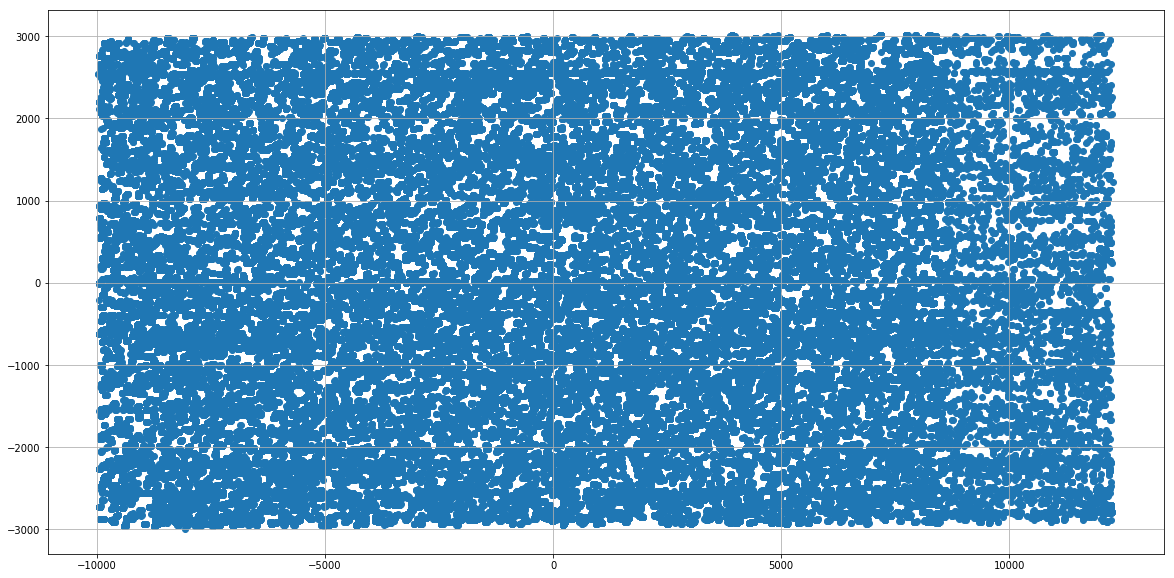

In [106]:
# plot without clusters
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(X_2d[:, 0], X_2d[:, 1])
ax.grid()
plt.show()

In [111]:
clusters = kmeans.predict(X)
clusters

array([1, 1, 1, ..., 2, 2, 2])

In [113]:
# metrics
from sklearn.metrics import silhouette_score

# S=(b-a)/max(a, b)
# a: average distance between each sample and samples from the same cluster
# b: average distance between each sample and nearest cluster samples

print(silhouette_score(X, clusters, sample_size=2000, random_state=42))

0.29427655603809333


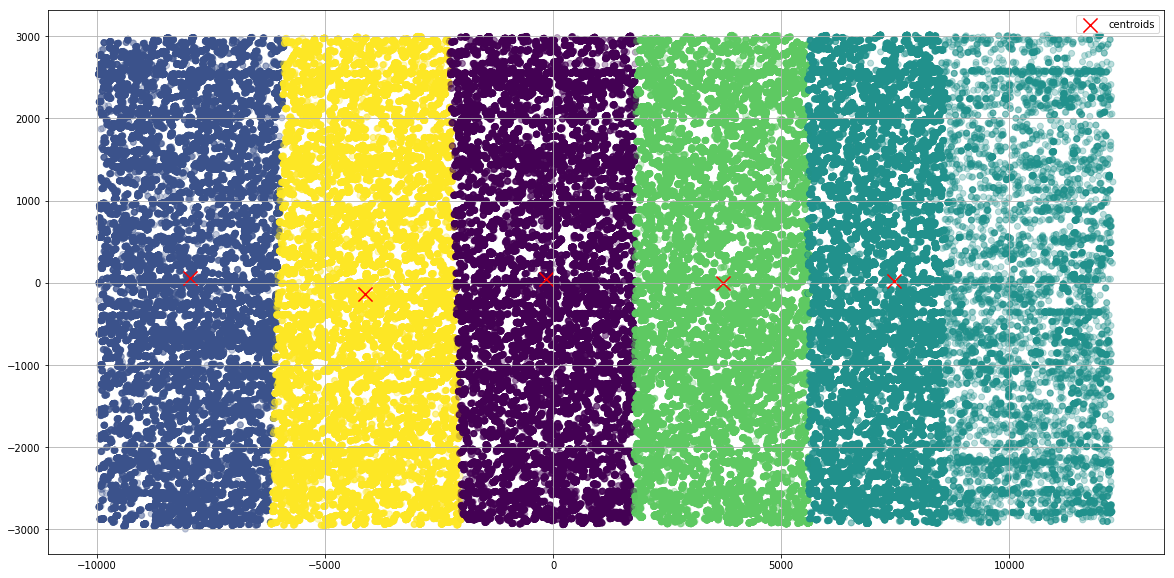

In [114]:
# plot with clusters and centroids
centroids_2d = pca.transform(kmeans.cluster_centers_)

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, alpha=.3)

ax.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
           marker='x', color='red', label='centroids', s=200)
ax.legend()
ax.grid()
plt.show()

### Exploring data with clusters

Now that we have the clusters, we can use pandas to divide the dataset into the clusters.

In [115]:
df['cluster'] = clusters
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,0,3249,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,35,1
1,0,2649,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,35,1
2,0,2855,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,35,1
3,0,2803,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,35,1
4,0,2802,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,35,1


In [116]:
df[df.cluster==1].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,0,3249,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,35,1
1,0,2649,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,35,1
2,0,2855,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,35,1
3,0,2803,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,35,1
4,0,2802,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,35,1


In [117]:
df[df.cluster==2].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
141,18536,3679,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,35,2
154,18537,2407,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,35,2
235,18538,1415,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,35,2
236,18538,919,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,35,2
237,18538,918,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,35,2


In [118]:
df[df.cluster==3].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
327807,11691,3087,PINK FLOWER FABRIC PONY,4,2011-09-06 11:58:00,3.75,13158.0,35,3
327958,11702,3235,JUMBO BAG RED RETROSPOT,50,2011-09-06 12:30:00,2.08,14667.0,35,3
327960,11702,3237,JUMBO BAG STRAWBERRY,10,2011-09-06 12:30:00,2.08,14667.0,35,3
327963,11702,3203,SCANDINAVIAN REDS RIBBONS,6,2011-09-06 12:30:00,1.25,14667.0,35,3
327966,11702,3204,BABY BOOM RIBBONS,6,2011-09-06 12:30:00,1.25,14667.0,35,3


In [119]:
df[df.cluster==1].describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,cluster
count,78198.000000,78198.000000,78198.000000,78198.000000,78198.000000,78198.000000,78198.0
mean,1991.432530,1462.449052,13.613724,3.218179,15365.602164,32.856799,1.0
std,1120.505951,893.620049,269.577529,10.292487,1741.821470,6.670197,0.0
min,0.000000,0.000000,1.000000,0.000000,12346.000000,0.000000,1.0
25%,1001.000000,828.000000,2.000000,1.250000,14030.250000,35.000000,1.0
50%,1998.000000,1338.000000,5.000000,1.950000,15311.000000,35.000000,1.0
75%,2979.000000,1787.000000,12.000000,3.750000,16948.000000,35.000000,1.0
max,4055.000000,3683.000000,74215.000000,1687.170000,18283.000000,35.000000,1.0


In [120]:
df[df.cluster==2].describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,cluster
count,79334.000000,79334.000000,79334.000000,79334.000000,79334.000000,79334.000000,79334.0
mean,17415.613003,1645.742481,7.052865,4.655128,15289.801271,33.065155,2.0
std,1382.578424,809.794257,489.292839,149.448649,1722.621787,6.352337,0.0
min,15547.000000,1.000000,-80995.000000,0.000000,12346.000000,0.000000,2.0
25%,16383.000000,1039.000000,1.000000,1.250000,13999.000000,35.000000,2.0
50%,17230.000000,1631.000000,3.000000,1.950000,15110.000000,35.000000,2.0
75%,18073.000000,2171.000000,10.000000,3.750000,16814.000000,35.000000,2.0
max,22189.000000,3683.000000,80995.000000,38970.000000,18283.000000,35.000000,2.0


In [121]:
df[df.cluster==3].describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,cluster
count,94529.000000,94529.000000,94529.000000,94529.000000,94529.000000,94529.000000,94529.0
mean,13685.626623,1655.982566,12.456421,3.150017,15283.320716,32.873288,3.0
std,1095.996221,793.402257,43.307155,28.072959,1677.385082,6.625718,0.0
min,11691.000000,1.000000,1.000000,0.000000,12347.000000,0.000000,3.0
25%,12733.000000,1046.000000,2.000000,1.250000,14031.000000,35.000000,3.0
50%,13705.000000,1689.000000,5.000000,1.950000,15154.000000,35.000000,3.0
75%,14606.000000,2166.000000,12.000000,3.750000,16713.000000,35.000000,3.0
max,15557.000000,3683.000000,4800.000000,4161.060000,18287.000000,35.000000,3.0
